In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import solve

In [2]:
N = 20
M = 20
k_h = 3
k_v = 5

In [3]:
# # Окружность
# curves = [
#     (
#         lambda t: np.cos(t*np.pi/2),
#         lambda t: np.sin(t*np.pi/2)
#     ),
#     (
#         lambda t: np.cos((t+1)*np.pi/2),
#         lambda t: np.sin((t+1)*np.pi/2)
#     ),
#     (
#         lambda t: np.cos((t+2)*np.pi/2),
#         lambda t: np.sin((t+2)*np.pi/2)
#     ),
#     (
#         lambda t: np.cos((t+3)*np.pi/2),
#         lambda t: np.sin((t+3)*np.pi/2)
#     ),
# ]
# Квадрат
# curves = [
#     (
#         lambda t: 1,
#         lambda t: 2*t-1
#     ),
#     (
#         lambda t: 1-2*t,
#         lambda t: 1
#     ),
#     (
#         lambda t: -1,
#         lambda t: 1-2*t
#     ),
#     (
#         lambda t: 2*t-1,
#         lambda t: -1
#     )
# ]
# Уродливая сетка
# curves = [
#     (
#         lambda t: 1-t,
#         lambda t: t
#     ),
#     (
#         lambda t: np.cos((t+1)*np.pi/2),
#         lambda t: np.sin((t+1)*np.pi/2)
#     ),
#     (
#         lambda t: np.cos((1-t)*np.pi/2)-1,
#         lambda t: np.sin((1-t)*np.pi/2)-1
#     ),
#     (
#         lambda t: np.cos((t+3)*np.pi/2),
#         lambda t: np.sin((t+3)*np.pi/2)
#     ),
# ]
# Уродливая, но выпуклая
# curves = [
#     (
#         lambda t: np.cos(t*np.pi/2),
#         lambda t: np.sin(t*np.pi/2)
#     ),
#     (
#         lambda t: np.cos((t+1)*np.pi/2),
#         lambda t: np.sin((t+1)*np.pi/2)
#     ),
#     (
#         lambda t: -1+t,
#         lambda t: 0
#     ),
#     (
#         lambda t: t,
#         lambda t: 0
#     ),
# ]
# Арка
curves = [
    (
        lambda t: np.cos(t*np.pi),
        lambda t: np.sin(t*np.pi)
    ),
    (
        lambda t: -1+t/2,
        lambda t: 0
    ),
    (
        lambda t: np.cos((1-t)*np.pi)/2,
        lambda t: np.sin((1-t)*np.pi)/2
    ),
    (
        lambda t: 1/2+t/2,
        lambda t: 0
    ),
]

In [4]:
# Check curves
for i in range(-1, 3):
    if curves[i][0](1) - curves[i+1][0](0) > 1e-14 or curves[i][1](1) - curves[i+1][1](0) > 1e-14:
        print(f'Bad curves: {i} and {i+1} cause {curves[i][0](1)} != {curves[i+1][0](0)} or {curves[i][1](1)} != {curves[i+1][1](0)}')
        break
else:
    print('Good curves')

Good curves


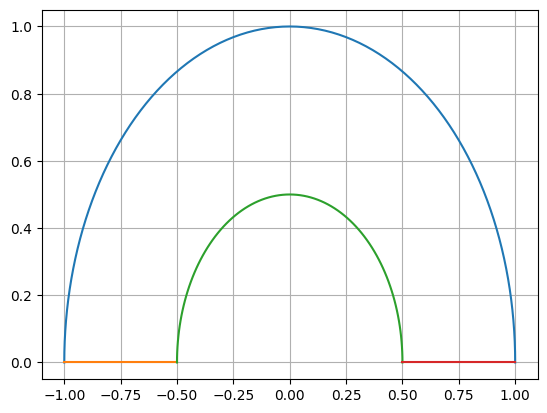

In [5]:
plt.figure()
plt.grid()
for curve in curves:
    x = [curve[0](t) for t in np.arange(0, 1.01, 0.01)]
    y = [curve[1](t) for t in np.arange(0, 1.01, 0.01)]
    plt.plot(x, y)

In [6]:
### Точки на границе
border_points = [
    [(curves[0][0](t), curves[0][1](t)) for t in np.arange(0, 1, 1/(N-1))],
    [(curves[1][0](t), curves[1][1](t)) for t in np.arange(0, 1, 1/(M-1))],
    [(curves[2][0](t), curves[2][1](t)) for t in np.arange(0, 1, 1/(N-1))],
    [(curves[3][0](t), curves[3][1](t)) for t in np.arange(0, 1, 1/(M-1))],
]
border_points[0]

[(1.0, 0.0),
 (0.9863613034027223, 0.1645945902807339),
 (0.9458172417006346, 0.32469946920468346),
 (0.8794737512064891, 0.4759473930370735),
 (0.7891405093963936, 0.6142127126896678),
 (0.6772815716257411, 0.7357239106731316),
 (0.5469481581224269, 0.8371664782625285),
 (0.40169542465296953, 0.9157733266550574),
 (0.24548548714079924, 0.9694002659393304),
 (0.0825793454723324, 0.9965844930066698),
 (-0.08257934547233227, 0.9965844930066698),
 (-0.24548548714079912, 0.9694002659393304),
 (-0.40169542465296926, 0.9157733266550575),
 (-0.5469481581224267, 0.8371664782625287),
 (-0.6772815716257409, 0.7357239106731317),
 (-0.7891405093963935, 0.6142127126896679),
 (-0.879473751206489, 0.4759473930370737),
 (-0.9458172417006345, 0.32469946920468407),
 (-0.9863613034027223, 0.16459459028073403)]

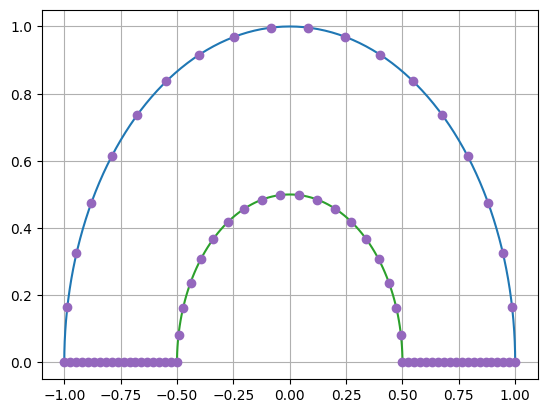

19


In [7]:
plt.figure()
plt.grid()
for curve in curves:
    x = [curve[0](t) for t in np.arange(0, 1.01, 0.01)]
    y = [curve[1](t) for t in np.arange(0, 1.01, 0.01)]
    plt.plot(x, y)
x = []
y = []
for points in border_points:
    for point in points:
        x.append(point[0])
        y.append(point[1])
plt.plot(x, y, 'o')
plt.show()
print(len(border_points[0]))

In [8]:
a = []
b = []
for i in range(1, N-1):
    for j in range(1, M-1):
        coefs = np.zeros([N, M])
        right_side = 0
        
        coefs[i+1][j] += k_h
        coefs[i][j] += -2*k_h
        coefs[i-1][j] += k_h
        
        coefs[i][j-1] += k_v
        coefs[i][j] += -2*k_v
        coefs[i][j+1] += k_v
        
        for k in range(N-1):
            right_side -= coefs[k][0] * border_points[0][k][0]
        for k in range(M-1):
            right_side -= coefs[N-1][k] * border_points[1][k][0]
        for k in range(N-1):
            right_side -= coefs[N-1-k][M-1] * border_points[2][k][0]
        for k in range(M-1):
            right_side -= coefs[0][M-1-k] * border_points[3][k][0]
        coefs = coefs[1:N-1, 1:M-1]
        a.append(coefs.flatten())
        b.append(right_side)
points_x = solve(a, b)
a = []
b = []
for i in range(1, N-1):
    for j in range(1, M-1):
        coefs = np.zeros([N, M])
        right_side = 0
        
        coefs[i+1][j] += k_h
        coefs[i][j] += -2*k_h
        coefs[i-1][j] += k_h
        
        coefs[i][j-1] += k_v
        coefs[i][j] += -2*k_v
        coefs[i][j+1] += k_v
        
        for k in range(N-1):
            right_side -= coefs[k][0] * border_points[0][k][1]
        for k in range(M-1):
            right_side -= coefs[N-1][k] * border_points[1][k][1]
        for k in range(N-1):
            right_side -= coefs[N-1-k][M-1] * border_points[2][k][1]
        for k in range(M-1):
            right_side -= coefs[0][M-1-k] * border_points[3][k][1]
        coefs = coefs[1:N-1, 1:M-1]
        a.append(coefs.flatten())
        b.append(right_side)
points_y = solve(a, b)

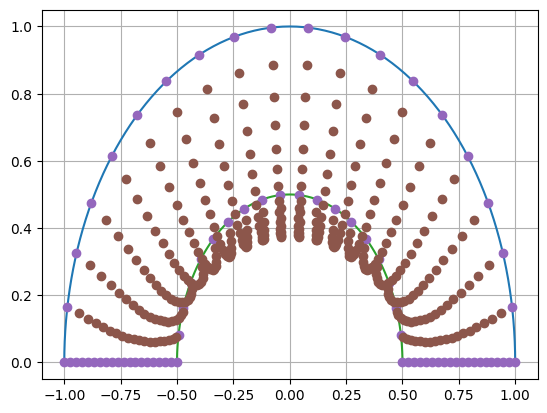

In [9]:
plt.figure()
plt.grid()
for curve in curves:
    x = [curve[0](t) for t in np.arange(0, 1.01, 0.01)]
    y = [curve[1](t) for t in np.arange(0, 1.01, 0.01)]
    plt.plot(x, y)
x = []
y = []
for points in border_points:
    for point in points:
        x.append(point[0])
        y.append(point[1])
plt.plot(x, y, 'o')
plt.plot(points_x, points_y, 'o')
plt.show()

In [10]:
all_points_x = np.zeros([N, M])
all_points_y = np.zeros([N, M])
all_points_x[1:N-1,1:M-1] = points_x.reshape([N-2, M-2])
all_points_y[1:N-1,1:M-1] = points_y.reshape([N-2, M-2])
h_lines = np.zeros([N, M])
v_lines = np.zeros([N, M])

for k in range(N-1):
    all_points_x[k][0] = border_points[0][k][0]
    all_points_y[k][0] = border_points[0][k][1]
for k in range(M-1):
    all_points_x[N-1][k] = border_points[1][k][0]
    all_points_y[N-1][k] = border_points[1][k][1]
for k in range(N-1):
    all_points_x[N-1-k][M-1] = border_points[2][k][0]
    all_points_y[N-1-k][M-1] = border_points[2][k][1]
for k in range(M-1):
    all_points_x[0][M-1-k] = border_points[3][k][0]
    all_points_y[0][M-1-k] = border_points[3][k][1]
    
# for i in range(N):
#     h_lines[i,:] = np.polyfit(all_points_x[i,:], all_points_y[i,:], M-1)
# for i in range(M):
#     v_lines[:,i] = np.polyfit(all_points_x[:,i], all_points_y[:,i], N-1)

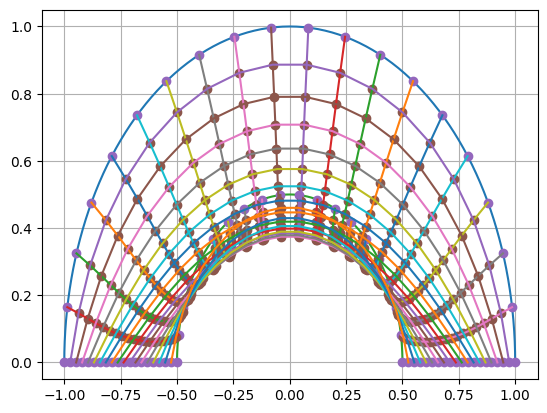

In [11]:
def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

plt.figure()
plt.grid()
for curve in curves:
    x = [curve[0](t) for t in np.arange(0, 1.01, 0.01)]
    y = [curve[1](t) for t in np.arange(0, 1.01, 0.01)]
    plt.plot(x, y)
x = []
y = []
for points in border_points:
    for point in points:
        x.append(point[0])
        y.append(point[1])
plt.plot(x, y, 'o')
plt.plot(points_x, points_y, 'o')
for i in range(1,N-1):
    #delta = (all_points_x[i, -1] - all_points_x[i, 0])/100
    #x = np.arange(all_points_x[i, 0], all_points_x[i, -1] + delta, delta)
    #y = PolyCoefficients(x, h_lines[i,:][::-1])
    x = all_points_x[i, :]
    y = all_points_y[i, :]
    plt.plot(x, y)
for i in range(1,M-1):
    # delta = (all_points_x[-1, i] - all_points_x[0, i])/100
    # x = np.arange(all_points_x[0, i], all_points_x[-1, i] + delta, delta)
    # y = PolyCoefficients(x, v_lines[:,i][::-1])
    x = all_points_x[:, i]
    y = all_points_y[:, i]
    plt.plot(x, y)
plt.show()